In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
data = pd.read_csv("Cleaned_Data.csv", encoding = "ISO-8859-1")

categorical_heads = ["gender","field_cd","race"]
for col in categorical_heads + [ch+"o" for ch in categorical_heads]:
    data[col] = data[col].astype("category")
    
mdata = data.loc[np.equal(data.iloc[:,0],1),:]
fdata = data.loc[np.equal(data.iloc[:,0],0),:]

In [6]:
mX = mdata.iloc[:,0:96]
my = mdata.iloc[:,96]
mX_train, mX_test, my_train, my_test = train_test_split(
    mX, my, test_size=500, stratify=my)

fX = fdata.iloc[:,0:96]
fy = fdata.iloc[:,96]
fX_train, fX_test, fy_train, fy_test = train_test_split(
    fX, fy, test_size=500, stratify=fy)

In [7]:
r_forest = RandomForestClassifier(n_estimators=400, random_state=1251)
param_grid = {
    "max_depth":[10,30,50,100,130],
    "max_features":[x for x in range(10, int(len(mX_train.columns)/2), 20)]
}

mg_searcher_r_forest = GridSearchCV(r_forest, param_grid, n_jobs= -1)
fg_searcher_r_forest = GridSearchCV(r_forest, param_grid, n_jobs= -1)
mfit_results = mg_searcher_r_forest.fit(mX_train, my_train)
ffit_results = fg_searcher_r_forest.fit(fX_train, fy_train)

In [8]:
mbest = mfit_results.best_estimator_
fbest = ffit_results.best_estimator_
features = mX_train.columns

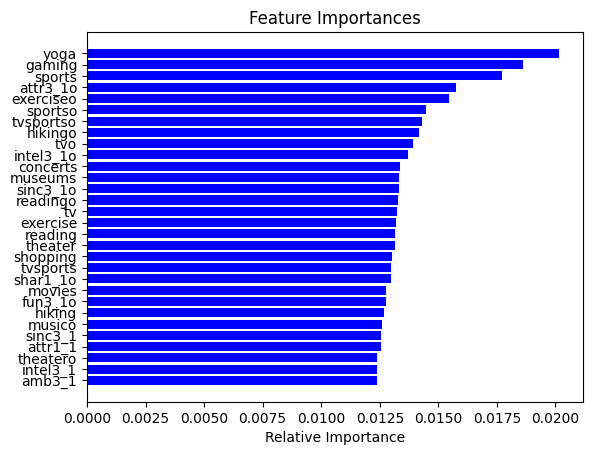

In [23]:
# male importances
importances = mbest.feature_importances_
indices = np.argsort(importances)
indices = indices[-30:]
plt.clf()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

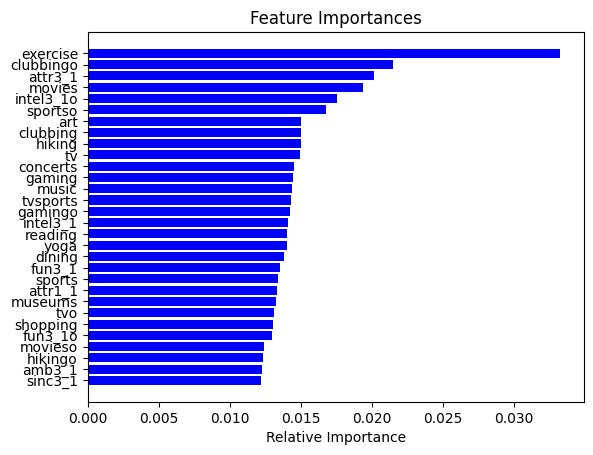

In [10]:
# female importances
importances = fbest.feature_importances_
indices = np.argsort(importances)
indices = indices[-30:]
plt.clf()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### total prediction accuracy

In [16]:
mpred = mbest.predict(mX_test)
fpred = fbest.predict(fX_test)
mc = np.sum(np.equal(mpred,my_test))
fc = np.sum(np.equal(fpred,fy_test))
mn = len(my_test)
fn = len(fy_test)
print("m", mc/mn)
print("f", fc/fn)
print("t", (mc+fc)/(mn+fn))

m 0.712
f 0.702
t 0.707


### accuracy on test data with a dec of 1

In [17]:
mpred = mbest.predict(mX_test[np.equal(my_test,1)])
fpred = fbest.predict(fX_test[np.equal(fy_test,1)])
mc = np.sum(np.equal(mpred,my_test[np.equal(my_test,1)]))
fc = np.sum(np.equal(fpred,fy_test[np.equal(fy_test,1)]))
fn = len(fpred)
mn = len(mpred)
print("m", mc/mn)
print("f", fc/fn)
print("t", (mc+fc)/(mn+fn))

m 0.6778242677824268
f 0.43169398907103823
t 0.5710900473933649


### accuracy on test data with a dec of 0

In [18]:
mpred = mbest.predict(mX_test[np.equal(my_test,0)])
fpred = fbest.predict(fX_test[np.equal(fy_test,0)])
mc = np.sum(np.equal(mpred,my_test[np.equal(my_test,0)]))
fc = np.sum(np.equal(fpred,fy_test[np.equal(fy_test,0)]))
fn = len(fpred)
mn = len(mpred)
print("m", mc/mn)
print("f", fc/fn)
print("t", (mc+fc)/(mn+fn))

m 0.7432950191570882
f 0.8580441640378549
t 0.8062283737024222


Assuming independance, \
P(match when both would match) = .55^2 =.3025 \
P(match when both dont want to match) = .18^2 = .0324 \
p(match when one would match but the other wouldnt) = .55*.18 = .1